## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
from sklearn.linear_model import LinearRegression

In [2]:
X = np.random.random(20)
X

array([0.08111108, 0.55260899, 0.55282767, 0.80154683, 0.09385932,
       0.86309379, 0.11394969, 0.32266401, 0.99820976, 0.58250899,
       0.93236685, 0.09011821, 0.51686701, 0.3815499 , 0.55895762,
       0.0640334 , 0.43759165, 0.62726974, 0.81190512, 0.40191704])

In [3]:
def assuming_func(x):
    return 13.4 * x + 5 + random.randint(-5,5)

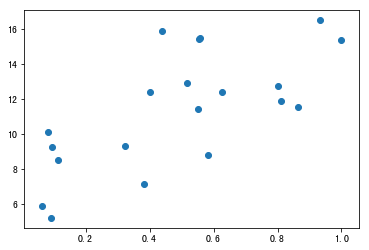

In [4]:
y = [assuming_func(x) for x in X]
plt.scatter(X,y)

In [5]:
"""
用LR来拟合函数
"""
y = np.array(y)
LR = LinearRegression()
reg = LR.fit(X.reshape(-1,1),y)

In [6]:
"""
R2值，越接近1说明拟合越好
"""
reg.score(X.reshape(-1,1),y)

0.4797565006047161

In [7]:
"""
参数的拟合值，k和b
"""
reg.coef_,reg.intercept_

(array([7.78817082]), 7.595575260318629)

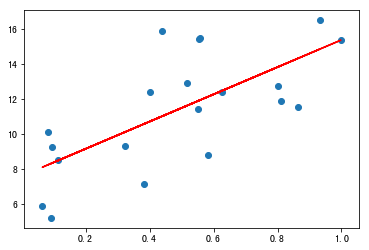

In [8]:
"""拟合好的函数"""

def func(x):
    return reg.coef_ * x + reg.intercept_

y_pred = np.array([func(x) for x in X])

plt.scatter(X.reshape(-1,1),y)
plt.plot(X.reshape(-1,1),y_pred,color='red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [9]:
"""
用欧式距离作为测度，找出和预测点最近的3个点，
并求均值作为预测值。
这个和分类不一样，是预测问题，
而且变量只有一个，用余弦距离度量不合适。
"""
from scipy.spatial.distance import pdist

def model(X,y):
    return [(x,y)for x,y in zip(X,y)]

def distance(x1,x2):
    return pdist([[x1,0],[x2,0]])

def predict(x,k=3):
    most_similars = sorted(model(X,y),key=lambda xi: distance(xi[0],x))[:k]
    return np.mean([pair[1] for pair in most_similars])

In [10]:
y_pred = [predict (x) for x in X]

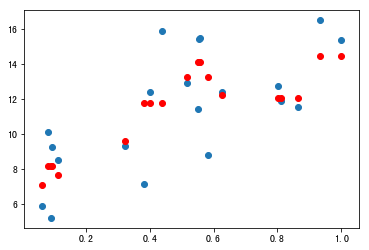

In [11]:
plt.scatter(X.reshape(-1,1),y)
plt.scatter(X.reshape(-1,1),y_pred,color='red')

In [12]:
predict(0.8)

12.061904311817917

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [68]:
from collections import Counter

In [69]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in counter]
    return -sum([p * np.log(p) for p in probs])

In [70]:
entropy([1,1,1,1])

-0.0

In [71]:
entropy([1,1,1,0])

0.5623351446188083

In [72]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [73]:
import pandas as pd

In [74]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [75]:
set(dataset['family_number'])

{1, 2}

In [76]:
"""
以 family number 作为分裂特征进行分裂
"""
sub_split_11 = dataset[dataset['family_number']==1]['bought'].tolist()

In [77]:
sub_split_11

[1, 1, 0, 0, 0]

In [78]:
sub_split_12 = dataset[dataset['family_number']!=1]['bought'].tolist()
sub_split_12

[1, 1]

In [79]:
set(dataset['gender'])

{'F', 'M'}

In [80]:
"""
以性别作为分裂特征进行分裂
"""

sub_split_21 = dataset[dataset['gender']=='M']['bought'].tolist()
sub_split_21

[0, 0, 1]

In [81]:
sub_split_22 = dataset[dataset['gender']!='M']['bought'].tolist()
sub_split_22

[1, 1, 1, 0]

In [82]:
entropy(sub_split_11) + entropy(sub_split_12)

0.6730116670092565

In [83]:
"""
可以看到以family number 作为分裂特征，分裂后的熵更小，
则数据的混乱程度更小，进一步计算得到的信息增益更大。
两相比较选择family number作为最佳分裂特征。
"""

entropy(sub_split_21) + entropy(sub_split_22)

1.198849312913621

In [84]:
dataset.columns.tolist()

['gender', 'income', 'family_number', 'bought']

In [85]:
from icecream import ic

In [88]:
def find_the_min_spliter(trainning_data:pd.DataFrame,target:str)->str:
    x_fields = set(trainning_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(trainning_data[f])
        ic(values)
        
        for v in values:
            ic(v)
            sub_spliter_1 = trainning_data[trainning_data[f]==v][target].tolist()
            sub_spliter_2 = trainning_data[trainning_data[f]!=v][target].tolist()
            ic(sub_spliter_1)
            ic(sub_spliter_2)
            
            entropy_v = entropy(sub_spliter_1) + entropy(sub_spliter_2)
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
    print('Spliter is: {}'.format(spliter))
    print('The min entropy is: {}'.format(min_entropy))
    return spliter

In [89]:
find_the_min_spliter(dataset,'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| v: 'F'
ic| sub_spliter_1: [1, 1, 1, 0]
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_v: 1.198849312913621
ic| v: 'M'
ic| sub_spliter_1: [0, 0, 1]
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| v: 1
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| sub_spliter_2: [1, 1]
ic| entropy_v: 0.6730116670092565
ic| v: 2
ic| sub_spliter_1: [1, 1]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_v: 0.6730116670092565
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| v: '+10'
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| sub_spliter_2: [1, 1]
ic| entropy_v: 0.6730116670092565
ic| v: '-10'
ic| sub_spliter_1: [1, 1]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_v: 0.6730116670092565


Spliter is: ('income', '-10')
The min entropy is: 0.6730116670092565


('income', '-10')

In [90]:
"""
可以看到应该选择收入为首先分割的特征，
收入为-10的时候，样本都是同一类，
所以对收入为10的样本再进行划分
"""

sub_dataset_1 = dataset[dataset['income']=='+10']
sub_dataset_1

,gender,income,family_number,bought
0,F,+10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [91]:
find_the_min_spliter(sub_dataset_1,'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| v: 'F'
ic| sub_spliter_1: [1, 1, 0]
ic| sub_spliter_2: [0, 0]
ic| entropy_v: 0.6365141682948128
ic| v: 'M'
ic| sub_spliter_1: [0, 0]
ic| sub_spliter_2: [1, 1, 0]
ic| entropy_v: 0.6365141682948128
ic| f: 'family_number'
ic| values: {1, 2}
ic| v: 1
ic| sub_spliter_1: [1, 0, 0, 0]
ic| sub_spliter_2: [1]
ic| entropy_v: 0.5623351446188083
ic| v: 2
ic| sub_spliter_1: [1]
ic| sub_spliter_2: [1, 0, 0, 0]
ic| entropy_v: 0.5623351446188083
ic| f: 'income'
ic| values: {'+10'}
ic| v: '+10'
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| sub_spliter_2: []
ic| entropy_v: 0.6730116670092565


Spliter is: ('family_number', 2)
The min entropy is: 0.5623351446188083


('family_number', 2)

In [92]:
"""
可以看到第二步的最佳分割特征为gender，
gender为M时，都划分为一类，
所以再对gender为F的子集进行分割
"""

sub_dataset_2 = sub_dataset_1[sub_dataset_1['gender']=='F']
sub_dataset_2

,gender,income,family_number,bought
0,F,+10,1,1
2,F,+10,2,1
3,F,+10,1,0


In [93]:
find_the_min_spliter(sub_dataset_2,'bought')

ic| f: 'gender'
ic| values: {'F'}
ic| v: 'F'
ic| sub_spliter_1: [1, 1, 0]
ic| sub_spliter_2: []
ic| entropy_v: 0.6365141682948128
ic| f: 'family_number'
ic| values: {1, 2}
ic| v: 1
ic| sub_spliter_1: [1, 0]
ic| sub_spliter_2: [1]
ic| entropy_v: 0.6931471805599453
ic| v: 2
ic| sub_spliter_1: [1]
ic| sub_spliter_2: [1, 0]
ic| entropy_v: 0.6931471805599453
ic| f: 'income'
ic| values: {'+10'}
ic| v: '+10'
ic| sub_spliter_1: [1, 1, 0]
ic| sub_spliter_2: []
ic| entropy_v: 0.6365141682948128


Spliter is: ('income', '+10')
The min entropy is: 0.6365141682948128


('income', '+10')

In [94]:
sub_dataset_3 = sub_dataset_2[sub_dataset_2['family_number']==1]
sub_dataset_3

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0


In [38]:
find_the_min_spliter(sub_dataset_3,'bought')

ic| f: 'gender'
ic| values: {'F'}
ic| v: 'F'
ic| sub_spliter_1: [1, 0]
ic| sub_spliter_2: []
ic| entropy_v: 0.6931471805599453
ic| f: 'family_number'
ic| values: {1}
ic| v: 1
ic| sub_spliter_1: [1, 0]
ic| sub_spliter_2: []
ic| entropy_v: 0.6931471805599453
ic| f: 'income'
ic| values: {'+10'}
ic| v: '+10'
ic| sub_spliter_1: [1, 0]
ic| sub_spliter_2: []
ic| entropy_v: 0.6931471805599453


Spliter is: ('gender', 'F')
The min entropy is: 0.6931471805599453


('gender', 'F')

**第三个特征划分完毕后，就不用再进行划分了**
[![KhS8SS.md.jpg](https://s2.ax1x.com/2019/10/30/KhS8SS.md.jpg)](https://imgchr.com/i/KhS8SS=100*50)

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [39]:
from sklearn.cluster import KMeans

In [40]:
X = [random.randint(0,100) for _ in range(100)]
Y = [random.randint(0,100) for _ in range(100)]

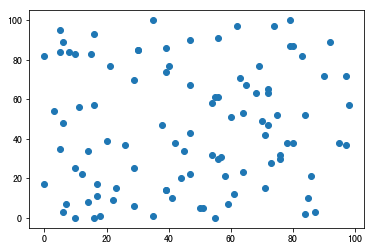

In [41]:
plt.scatter(X,Y)

In [42]:
trainning_date = [(x,y) for x,y in zip(X,Y)]

In [43]:
cluster = KMeans(n_clusters=6,max_iter=500)
cluster.fit(trainning_date)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
cluster.cluster_centers_

array([[20.21052632, 10.78947368],
       [70.47619048, 52.47619048],
       [22.05882353, 84.52941176],
       [77.        , 85.16666667],
       [63.76190476, 18.23809524],
       [18.1       , 44.5       ]])

In [45]:
cluster.labels_

array([0, 1, 2, 2, 2, 0, 0, 0, 0, 3, 2, 3, 5, 4, 1, 0, 2, 0, 1, 0, 5, 2,
       3, 0, 4, 1, 2, 4, 2, 3, 0, 1, 2, 2, 4, 2, 2, 3, 1, 1, 4, 1, 3, 1,
       0, 2, 4, 3, 0, 4, 4, 5, 1, 4, 1, 3, 1, 1, 0, 0, 4, 2, 4, 4, 0, 0,
       3, 5, 1, 4, 1, 1, 3, 3, 5, 3, 1, 1, 2, 4, 4, 4, 4, 0, 4, 5, 4, 5,
       2, 4, 1, 2, 5, 4, 5, 0, 0, 1, 1, 5], dtype=int32)

In [46]:
from collections import defaultdict

centers = defaultdict(list)

In [47]:
for label,location in zip(cluster.labels_,trainning_date):
    centers[label].append(location)

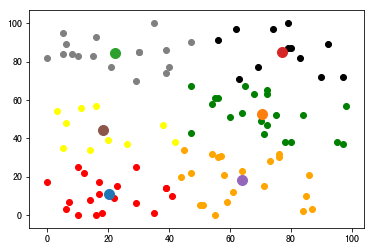

In [48]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location,c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center,s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

**Answer 1:**

**Model can be regarded as a decision method to abstract,simplify and solve a problem.** In general, When we model a certain problem, we would observe the available data or other information, 
and choose some revelant factors (what we call 'features') as inputs,and then choose the target as output. Once we successfully build a model,we can make decisions quickly when we encounter a similar problem.

**Answer 2:**

**Because the mission of scientists is to prove that the previous works are wrong and to present their own theories.** There may be some problems in ML models which we have learned,but anyway the existing ML models can help us finish lots of difficult tastks.

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

**1 Overfitting**

Overfitting is the case where the overall cost is really samll,but the generalization of the model is unreliable. This is due to the model learning too much from the dataset.

**The possible reasons：**

* the model is too complicated.
* the size of dataset is too small.
* the parameters of the model is too large.
* the distribution of the trainning date is not correct,which means the model only capture a small part of the information in the real dataset.

**2 Underfitting**

Underfitting is the case where the model has not learned enough from the trainning data,resulting in low generalization and unreliable predictious.

**The possible reasons:**

* the model is too simple to capture the underlying trend of the data.

* there are too few features used in the model.

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

**1 The definition**

First of all,we need to know what is confusion matrix. Let's assume that we have fed the trainning data to a model and received a classification. The predicted vs actual classification can be charted in a table called confusion matrix.

[![KgQwrV.md.png](https://s2.ax1x.com/2019/10/28/KgQwrV.md.png)](https://imgchr.com/i/KgQwrV=100*50)

* TN / True Negative: case was negative and predicted negative.
* TP / True Positive: case was positive and predicted positive.
* FN / False Negative: case was positive but predicted negative.
* FP / False Positive: case was negative but predicted positive.

Then,precision is defined as the number of TP over the number of TP plus the number of FP.$$ Precision=\frac {TP}{TP+FP}$$

Recall is defined as the number of TP over the number of TP plus the number of FN.$$ Pecall=\frac {TP}{TP+FN}$$

Fscore is defined as the harmonic mean of precision and recall.$$ F=(1+\beta^2)×\frac{P×R}{\beta^2P+R}$$ If we consider that precision and recall are equal important($\beta=1$) ,then we can get $$ F1=2×\frac{P×R}{P+R}$$ If we consider recall to be more important($\beta>1$), then we can get F2 score.

AUC-ROC curve is a performance measurement for classification problem. ROC is a probability curve and AUC represents degree of separability. Higher the AUC, better the model is capable of distingushing between classes. AUC stands for area under the ROC curve.

**2 Matters needing attention in use**

Precision helps when the costs of false positives are high.When false positives are too high, those who monitor the results will learn to ignore them after being bombarded with false alarms.

Recall helps when the cost of false negatives is high. When false negatives are frequent, you may get heart by the thing you want to avoid.

Fscore is an overall measure of a model’s accuracy that combines precision and recall, in that weird way that addition and multiplication just mix two ingredients to make a separate dish altogether. IF we consider precision and recall to be equal important,then we can choose F1 score,while if recall is more important, we can choose F2 score.

If we want to measure how well the positive classes are separated from the negative classes,we can use AUC-ROC curve.

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data,identify patterns and make decisions with minimal human intervention.

**There are also some cases that ML solutions are not good choices**. 

For example,you don't need ML if you can determine a target value by using simple rules,computations,or predetermined steps that can be programmed without needing any data-driven learning. 

**We can using machine learning for the following situations**:

* you cannot code the rules: many human tasks(such as recognizing whether an email is spam or not spam) cannot be adequately solved using a simple(deterministic),rule-based solution. A large number of factors could influence the answer. When rules depend on too many factors and many of the rules overlap or need to be tuned very finely, it soon becomes difficult for a human to accurately code the rules.

* you cannot scale: you might be able to manually recognize a few hundred emails and decide whether they are spam or not. However, this task becomes tedious for millions of emails.ML solutions are effective at handling large-scale problems.

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

The sentence above means the evaluation criterion of ML model is very important and need to be choosed carefully.

There are several evaluation methods，but which is appropriate depends on the specific task.

For example，if we want to build a model to predict the probability of having cancer，we'd better pay more attention to recall and F2 score. Because  false negatives can make us ignore the risk and miss the opportunity of timely treatment.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [49]:
# coding:utf-8
from math import log
import operator
import numpy as np
from collections import Counter

In [50]:
"""
用于处理字典类型的输入数据，
得到纯数据（包括label)和特征标签
"""

def create_dataset(dataset:dict): 
    """
    :dataset: 字典类型的数据集，包含目标变量
    """
    train_data = [v for v in dataset.values()]
    train_data = list(map(list,zip(*train_data)))
    labels = [k for i,k in enumerate(dataset.keys()) if i < len(dataset)-1]
    return train_data, labels

In [51]:
mock_data = {
        'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
        'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
        'family_number': [1, 1, 2, 1, 1, 1, 2],
        'bought': [1, 1, 1, 0, 0, 0, 1],
    }

train_data,labels = create_dataset(mock_data)

In [52]:
train_data

[['F', '+10', 1, 1],
 ['F', '-10', 1, 1],
 ['F', '+10', 2, 1],
 ['F', '+10', 1, 0],
 ['M', '+10', 1, 0],
 ['M', '+10', 1, 0],
 ['M', '-10', 2, 1]]

In [53]:
labels

['gender', 'income', 'family_number']

In [54]:
"""
用于计算数据集的熵
"""

def calc_entropy(dataset):  
    """
    :dataset: 字典类型的数据集，包含目标变量
    """
    size_dataset =len(dataset)  
    labels = [data[-1] for data in dataset]
    label_counts = Counter(labels)
    
    probs = [label_counts[c] / size_dataset for c in set(labels)]
    entropy = -sum(p * log(p,2) for p in probs)
    return round(entropy,4)

In [55]:
calc_entropy(train_data)

0.9852

In [56]:
"""
根据某个特征和值对数据集进行分割
得到样本子集合
"""

def split_dataset(dataset,index,value): 
    """
    :index: 特征对应的索引，用于取特征
    :value: 特征的分割点
    """
    sub_dataset=[]
    for feat_vec in dataset:
        if feat_vec[index] == value:
            feat_vec_split =feat_vec[:index] + feat_vec[index+1:]
            sub_dataset.append(feat_vec_split)
    return sub_dataset

In [57]:
split_dataset(train_data,1,'+10')

[['F', 1, 1], ['F', 2, 1], ['F', 1, 0], ['M', 1, 0], ['M', 1, 0]]

In [58]:
"""
对所有的特征计算信息增益，信息增益最大的特征，
作为最佳的特征，用于分裂
"""

def choose_best_feat(dataset): 
    """
    :best_feat: 返回值不是特征的名称，而是特征的索引
    """
    num_feat = len(dataset[0])-1
    base_entropy = calc_entropy(dataset)  
    
    best_info_gain = 0
    best_feat = -1
    for i in range(num_feat):
        feat_list = [example[i] for example in dataset]
        values = set(feat_list)
        new_entropy = 0
        for value in values:
            sub_dataset = split_dataset(dataset,i,value)
            prob = len(sub_dataset) / float(len(dataset))
            new_entropy += prob * calc_entropy(sub_dataset)  
        info_gain = base_entropy - new_entropy  
        if (info_gain > best_info_gain):   
            best_info_gain = info_gain
            best_feat = i
            
    return best_feat

In [59]:
choose_best_feat(train_data)

1

In [60]:
labels[choose_best_feat(train_data)]

'income'

In [61]:
"""
当叶节点的样本类型大于等于2时，取样本数最多的类型，
作为该叶节点的分类。
如[1,1,1,0,0]为叶节点的样本集，
那么类型为1
"""

def major_count(class_list): 
    """
    :class_list: 叶节点的目标变量集合
    """
    class_count = Counter(class_list)
    class_count_sorted = sorted(class_count.items(),key=operator.itemgetter(1),reverse=True)
    return class_count_sorted[0][0]

In [62]:
major_count([1,1,1,0,0])

1

In [63]:
"""
综合利用上面的函数和数据集，训练决策树模型。
决策树的决策规则存为字典嵌套的格式。
运用递归来创建决策树，递归停止条件有两个：
1是子集合都属于同一种类型，2是已经对所有的特征都进行了分割（此时取样本最多的类型）
"""

def create_tree(dataset,labels):

    class_list = [example[-1] for example in dataset]  
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    if len(dataset[0]) == 1:
        return major_count(class_list)
    
    best_feat = choose_best_feat(dataset) 
    best_feat_label = labels[best_feat]
    myTree = {best_feat_label:{}} 
    del(labels[best_feat])
    
    feat_values = [example[best_feat] for example in dataset]
    unique_vals = set(feat_values)
    for value in unique_vals:
        sub_labels = labels[:]
        myTree[best_feat_label][value] = create_tree(split_dataset\
                            (dataset,best_feat,value),sub_labels)
    return myTree

In [64]:
dataset,labels = create_dataset(mock_data)
my_tree = create_tree(dataset, labels)

my_tree

{'income': {'+10': {'gender': {'F': {'family_number': {1: 1, 2: 1}}, 'M': 0}},
  '-10': 1}}

In [65]:
"""
对新样本进行预测
"""

def predict(X:dict,model):
    """
    :X: 待预测的数据，字典格式
    :model: 以字典嵌套形式保存的决策树
    """
    split_feature = list(model.keys())[0]
    value = X[split_feature]
    result = model[split_feature][value]
    if type(result).__name__ != 'dict':
        return result
    else:
        return predict(X, result)

In [66]:
example = ['F','+10',2]
labels = ['gender','income','family_number']
X_test = dict(zip(labels,example))  
X_test

{'gender': 'F', 'income': '+10', 'family_number': 2}

In [67]:
y_pred = predict(X_test,my_tree)
y_pred

1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [49]:
from sklearn.datasets import load_boston

In [50]:
dataset = load_boston()
x,y=dataset['data'],dataset['target']

In [51]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

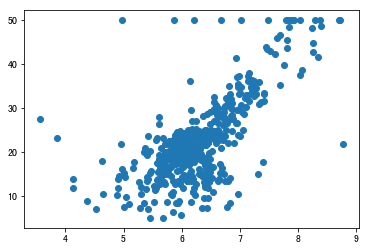

In [52]:
X_rm = x[:,5]

plt.scatter(X_rm,y)

In [53]:
"""
假设目标函数为一元线性回归函数，
用梯度下降来求参数
"""

def price(rm,k,b):
    return k * rm + b

### 定义损失函数为绝对值损失函数

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|}$$

In [54]:
"""
定义损失函数为绝对值损失函数
"""

def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

### 计算k和b的偏导数，是分段函数

$$ \frac{\partial{loss}}{\partial{k}} = \begin{cases}
-\frac{1}{n}\sum(x_i) & y_i > \hat{y_i} \\
0 & y_i = \hat{y_i} \\
\frac{1}{n}\sum(x_i) & y_i < \hat{y_i}
\end{cases}$$

$$ \frac{\partial{loss}}{\partial{b}} = \begin{cases}
-\frac{1}{n} & y_i > \hat{y_i} \\
0 & y_i = \hat{y_i} \\
\frac{1}{n} & y_i < \hat{y_i}
\end{cases}$$

In [55]:
"""
计算损失关于k和b的偏导数
"""
def get_sign(y_i,y_hat_i):
    if (y_i - y_hat_i) == 0:
        sign = 0
    else: 
        sign = (y_i - y_hat_i) / abs(y_i - y_hat_i)
    return sign
        
def partial_derivative_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        sign = get_sign(y_i,y_hat_i)
        gradient += sign * x_i
    return -1/n * gradient

def partial_derivative_b(y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        sign = get_sign(y_i,y_hat_i)
        gradient += sign
    return -1/n * gradient

In [80]:
"""
初始化参数
"""

k = random.random() * 200 - 100   # -100到100
b = random.random() * 200 - 100

learning_rate = 1e-1
iteration_num = 300
losses = []

for i in range(iteration_num):
    
    price_pred = [price(r,k,b) for r in X_rm]
    current_loss = loss(y, price_pred)
    
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_pred)
    b_gradient = partial_derivative_b(y, price_pred)
    print('k_gradient is {}'.format(k_gradient))
    print('b_gradient is {}'.format(b_gradient))
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
    
    
best_k = k
best_b = b

Iteration 0, the loss is 401.8549128692984, parameters k is 75.98898835470402 and b is -53.17529008063777
k_gradient is 6.284634387351787
b_gradient is 0.9999999999999999
Iteration 1, the loss is 397.8052499310298, parameters k is 75.36052491596884 and b is -53.275290080637774
k_gradient is 6.284634387351787
b_gradient is 0.9999999999999999
Iteration 2, the loss is 393.7555869927612, parameters k is 74.73206147723366 and b is -53.375290080637775
k_gradient is 6.284634387351787
b_gradient is 0.9999999999999999
Iteration 3, the loss is 389.7059240544931, parameters k is 74.10359803849848 and b is -53.47529008063778
k_gradient is 6.284634387351787
b_gradient is 0.9999999999999999
Iteration 4, the loss is 385.6562611162246, parameters k is 73.4751345997633 and b is -53.57529008063778
k_gradient is 6.284634387351787
b_gradient is 0.9999999999999999
Iteration 5, the loss is 381.6065981779561, parameters k is 72.84667116102811 and b is -53.67529008063778
k_gradient is 6.284634387351787
b_grad

k_gradient is -0.011994071146245747
b_gradient is -0.03952569169960474
Iteration 195, the loss is 4.86889119717767, parameters k is 13.595900805296617 and b is -62.7282545075153
k_gradient is 0.03718379446640221
b_gradient is -0.03162055335968379
Iteration 196, the loss is 4.868796233006136, parameters k is 13.592182425849977 and b is -62.72509245217933
k_gradient is -0.011994071146245747
b_gradient is -0.03952569169960474
Iteration 197, the loss is 4.868625619201432, parameters k is 13.593381832964601 and b is -62.72113988300937
k_gradient is -0.011994071146245747
b_gradient is -0.03952569169960474
Iteration 198, the loss is 4.868492179947673, parameters k is 13.594581240079226 and b is -62.71718731383941
k_gradient is 0.03718379446640221
b_gradient is -0.03162055335968379
Iteration 199, the loss is 4.868374621480023, parameters k is 13.590862860632585 and b is -62.71402525850344
k_gradient is -0.011994071146245747
b_gradient is -0.03952569169960474
Iteration 200, the loss is 4.868204

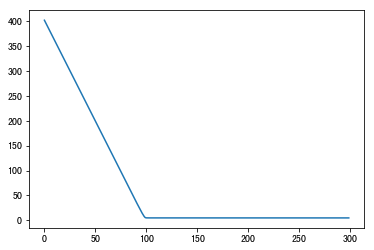

In [81]:
plt.plot(list(range(iteration_num)),losses)

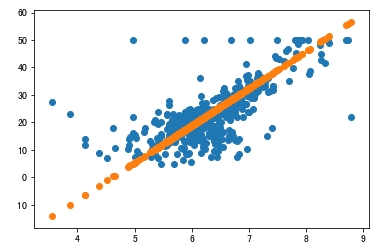

In [82]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_best_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)